<a href="https://colab.research.google.com/github/RupeshSharma14/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Importing Libraries**

In [89]:
# Importing data analysis and visualisation libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from google.colab import drive

%matplotlib inline

In [90]:
import datetime as dt

In [91]:
# Configuration for matplotlib graphs

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

# **Reading the data**

In [92]:
# Mounting the google drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
# Loading the dataset

path = "/content/drive/MyDrive/Online Retail Customer Segmentation/Online Retail.xlsx"
retail_df = pd.read_excel(path)

In [94]:
# Displaying the first five rows of the dataset

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [95]:
# Displaying the last five rows of the dataset

retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [96]:
# Size of the dataset

retail_df.shape

(541909, 8)

The dataset consists of 541909 rows and 8 columns.

In [97]:
# Checking for duplicate rows in the dataset

retail_df.duplicated().sum()

5268

There are 5268 duplicate rows in the dataset.

In [98]:
# Dropping the duplicate rows of the dataset

retail_df.drop_duplicates(inplace = True)

In [99]:
# Checking for any Null values

retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

CustomerID and Description features contain Null values.

In [100]:
# Dropping Null values present in the dataset

retail_df.dropna(inplace = True)

In [101]:
# Size of the dataset after removing Null values

retail_df.shape

(401604, 8)

In [102]:
# Checking the data type of variables

retail_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

The CustomerID datatype should be object, not float.

In [103]:
#  Converting the data type of "CustomerID" column to an object

# retail_df["CustomerID"] = retail_df["CustomerID"].astype(str)

In [104]:
# Extracting new features from InvoiceDate column

retail_df["Year"] = retail_df["InvoiceDate"].dt.year
retail_df["Month"] = retail_df["InvoiceDate"].dt.month_name()
retail_df["Weekday"] = retail_df["InvoiceDate"].dt.day_name()
retail_df["Hour"] = retail_df["InvoiceDate"].dt.hour

In [105]:
# Descriptive Summary

retail_df.describe()

,Quantity,UnitPrice,CustomerID,Year,Hour
count,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,2010.934378,12.731031
std,250.283037,69.764035,1714.006089,0.247620,2.288211
min,-80995.000000,0.000000,12346.000000,2010.000000,6.000000
25%,2.000000,1.250000,13939.000000,2011.000000,11.000000
50%,5.000000,1.950000,15145.000000,2011.000000,13.000000
75%,12.000000,3.750000,16784.000000,2011.000000,14.000000
max,80995.000000,38970.000000,18287.000000,2011.000000,20.000000


The Quantity column consists of negative values. The negative values in Quantity may be due to the cancelled orders.
Let's make sure why these values are negative.

In [106]:
# Filtering out cancelled orders

cancelled_orders = retail_df[retail_df["InvoiceNo"].astype(str).str.contains("C")]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Weekday,Hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,December,Wednesday,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,December,Wednesday,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,December,Wednesday,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,December,Wednesday,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,December,Wednesday,10


In [107]:
# Checking cancelled orders having Quantities > 0

cancelled_orders[cancelled_orders['Quantity'] > 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Weekday,Hour


We can conclude that the negative values indicate that the order was cancelled because nothing is returned after filtering the cancelled orders by Quantity > 0.

I will remove the rows having negative quantity values as these rows represent cancelled orders. I will also removed the orders with prices of zeros, as they could be free gifts for customers.

In [108]:
# Removing rows where Quantity is negative and UnitPrice is 0

retail_temp_df = retail_df[retail_df["Quantity"] > 0]
retail_df = retail_temp_df[retail_temp_df["UnitPrice"] != 0]   

In [109]:
# Checking the columns after removing the values

retail_df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,392692.000000,392692.000000
mean,13.119702,3.125914
std,180.492832,22.241836
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


# **Exploratory Data Analysis**

**Number of unique customers**

In [110]:
print(f"Number of unique customers: {retail_df.CustomerID.nunique()}")

Number of unique customers: 4338


**Number of unique products sold**

In [111]:
print(f"Number of unique products sold: {retail_df.StockCode.nunique()}")

Number of unique products sold: 3665


**Number of unique countries**

In [112]:
print(f"Number of unique countries: {retail_df.Country.nunique()}")

Number of unique countries: 37


**Top 5 countries with most number of orders**

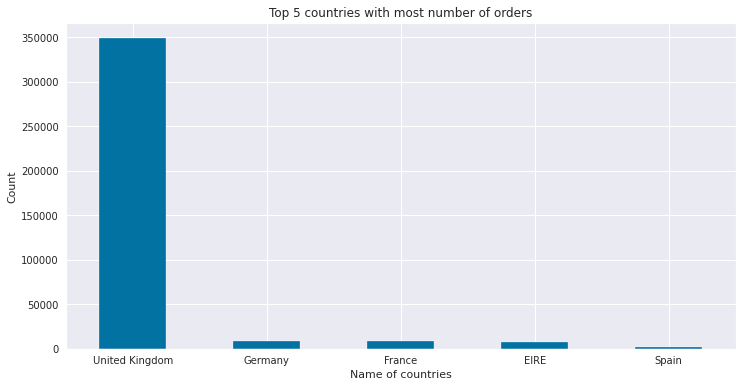

In [113]:
retail_df["Country"].value_counts().head().plot(kind = "bar")
plt.title("Top 5 countries with most number of orders")
plt.xlabel("Name of countries")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

The above visualisation shows that the majority of orders come from the United Kingdom, followed by Germany and France, indicating that Online Retail Marketing is very common in Europe.

**Top 5 countries with least number of orders**

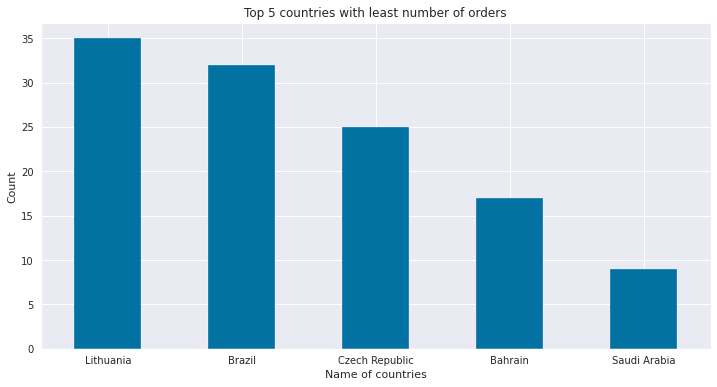

In [114]:
retail_df["Country"].value_counts().tail().plot(kind = "bar")
plt.title("Top 5 countries with least number of orders")
plt.xlabel("Name of countries")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

According to the above visualisation, the least number of orders come from the Saudi Arabia, followed by Bahrain, indicating that Online Retail Marketing has very few customers from the Middle East.

**Total number of customers per country**

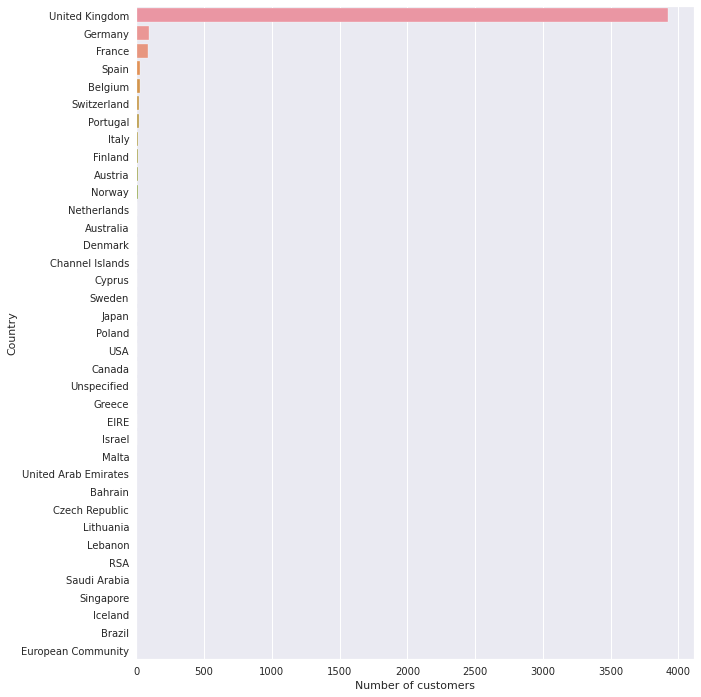

In [115]:
plt.figure(figsize = (10, 12))
customer_per_country = retail_df.groupby("Country")["CustomerID"].nunique().sort_values(axis = 0, ascending = False)
sns.barplot(x = customer_per_country.values, y = customer_per_country.index)
plt.xlabel("Number of customers")
plt.show()

It seems that United Kingdom has the most number of customers, in the dataset.

**Total sales revenue per country**

In [116]:
retail_df["TotalCost"] = retail_df["Quantity"] * retail_df["UnitPrice"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


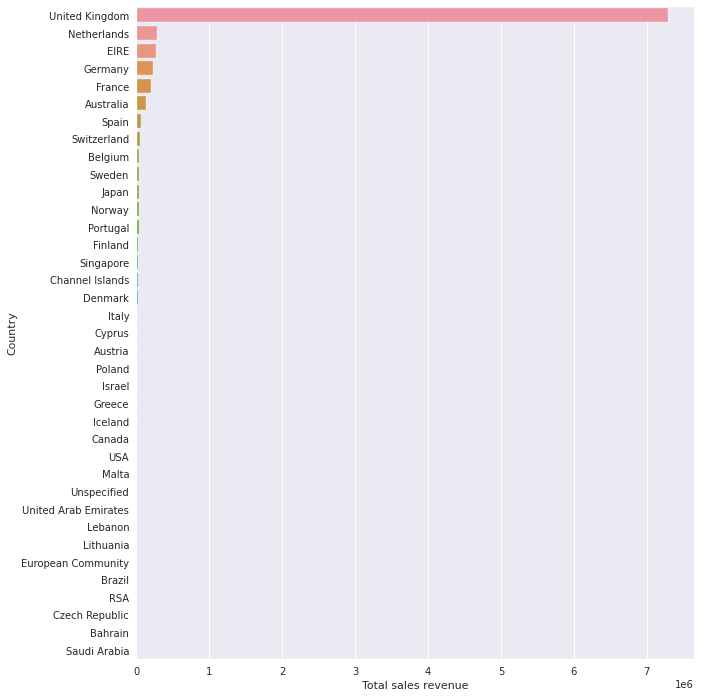

In [117]:
plt.figure(figsize = (10, 12))
customer_per_country = retail_df.groupby("Country")["TotalCost"].sum().sort_values(axis = 0, ascending = False)
sns.barplot(x = customer_per_country.values, y = customer_per_country.index)
plt.xlabel("Total sales revenue")
plt.show()

The United Kingdom has the most customers as well as the most sales revenue.  As a result, I will only use data from orders placed in the United Kingdom for the purpose of this project, as customer clusters vary by geography, according to research.

## **Exploring the UK market**

In [118]:
retail_uk_df = retail_df.loc[retail_df["Country"] == "United Kingdom"].copy()
retail_uk_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Weekday,Hour,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34


In [119]:
retail_uk_df.drop(columns = "Country", inplace = True)

**Number of unique customers in UK**

In [120]:
print(f"Number of unique customers in UK: {retail_uk_df.CustomerID.nunique()}")

Number of unique customers in UK: 3920


**Number of unique products in UK**

In [121]:
print(f"Number of unique products sold in UK: {retail_uk_df.StockCode.nunique()}")

Number of unique products sold in UK: 3645


**Proportion of one time and repeated customers**

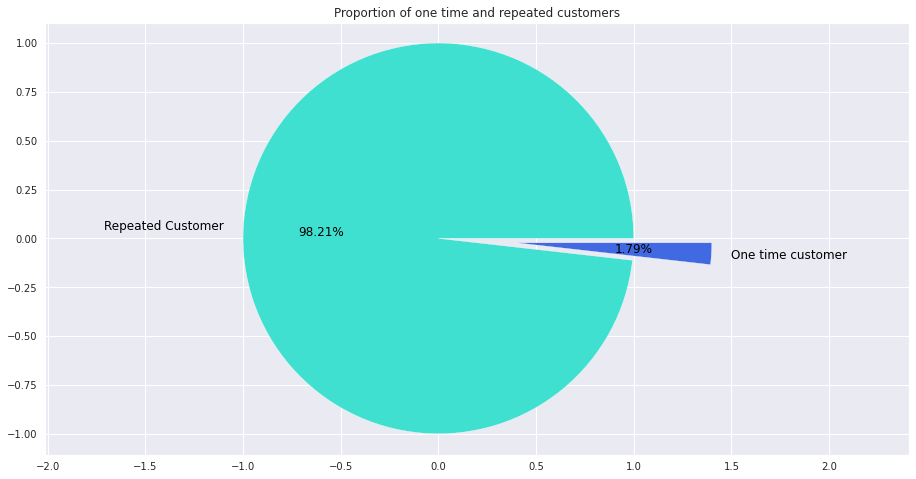

In [122]:
# Proportion of one time and repeated customers

customer_proportion = retail_uk_df["CustomerID"].value_counts().to_frame()
customer_proportion["repeated_customer"] = np.where(customer_proportion["CustomerID"] > 1, 1, 0)
customer_proportion["repeated_customer"].value_counts()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.pie(customer_proportion["repeated_customer"].value_counts(), labels = ["Repeated Customer", "One time customer"],
        explode = (0, 0.4), autopct = "%1.2f%%", colors = ["turquoise", "royalblue"], frame = True, textprops = dict(color = "black", size = 12))

ax.axis("equal")
plt.title("Proportion of one time and repeated customers")

plt.show()

The retail store in the United Kingdom has 98 percent repeat customers. The majority of customers appear to be satisfied with the retail store.

**Top 10 most sold products**

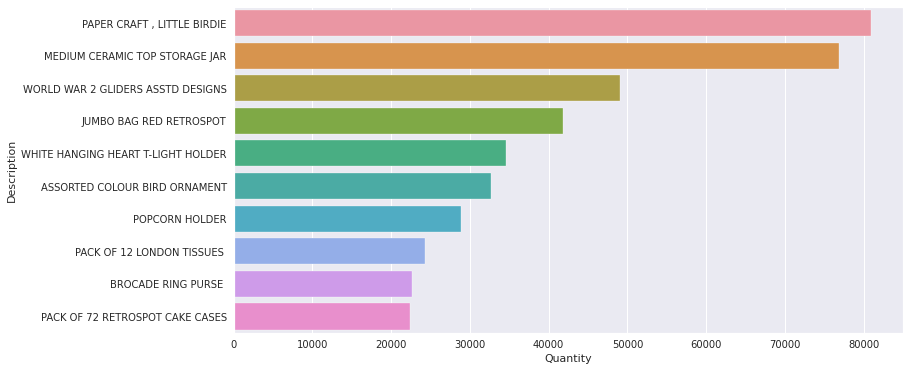

In [123]:
# Visualisation of top 10 most sold products

popular_product = retail_uk_df.groupby(["StockCode", "Description"], as_index = False)["Quantity"].sum().sort_values(by = "Quantity", ascending = False)
sns.barplot(x = "Quantity", y = "Description", data = popular_product.head(10))

plt.show()

**Top 10 least sold products**

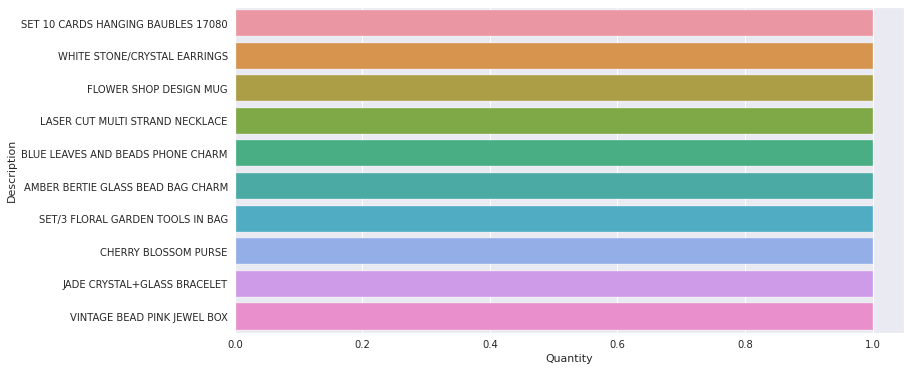

In [124]:
# Visualisation of top 10 least sold products

sns.barplot(x = "Quantity", y = "Description", data = popular_product.tail(10))

plt.show()

**Sales on Weekdays**

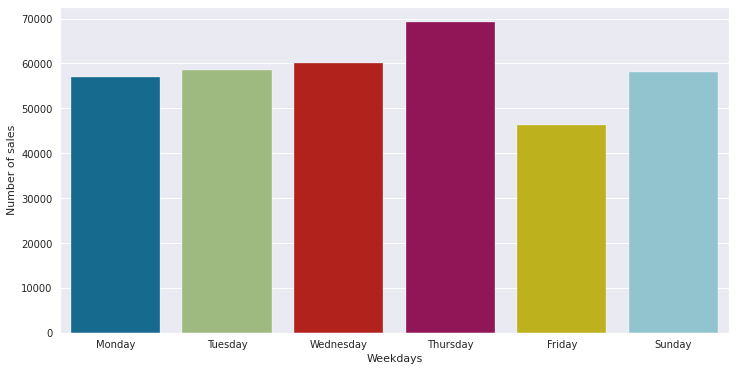

In [125]:
# Visualisation of total number of sales on weekdays 

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Sunday"]

weekdays_sale = retail_uk_df["Weekday"].value_counts()
sns.barplot(x = weekdays_sale.index, y = weekdays_sale.values, order = days_order)
plt.xlabel("Weekdays")
plt.ylabel("Number of sales")

plt.show()

The majority of orders appear to be placed on Thursday. It's also worth noting that no orders are placed on Saturdays; this indicate that the online store is closed on Saturdays for maintenance or stock inspection.

**Sales at a specific hour of day**

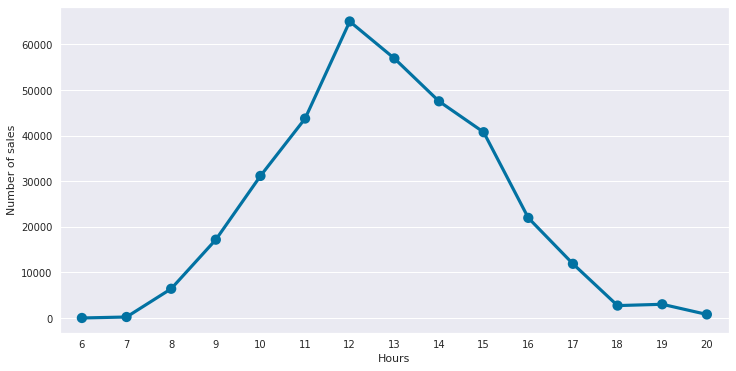

In [126]:
# Representation of total number of sales at specific hour of day

hours_sale = retail_uk_df["Hour"].value_counts()
sns.pointplot(x = hours_sale.index, y = hours_sale.values)
plt.xlabel("Hours")
plt.ylabel("Number of sales")
plt.show()

The majority of the sales have occurred between 11 am and 2 pm.

**Monthly sales trend**

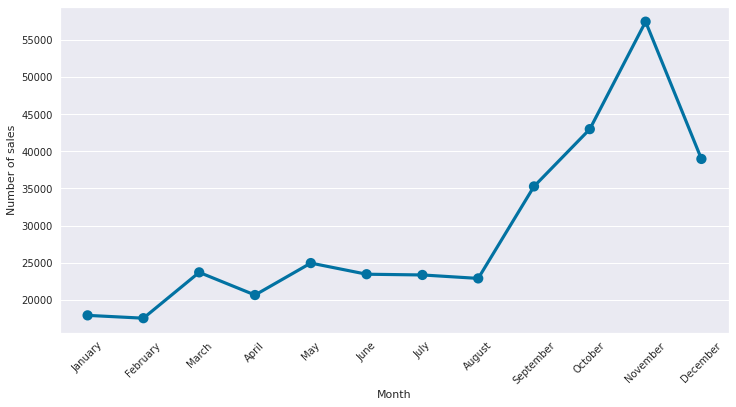

In [127]:
# Visualisation of monthly sales trend

months_order = ["January", "February", "March", "April", "May", "June", "July", 
                "August", "September", "October", "November", "December"]

monthly_sale = retail_uk_df["Month"].value_counts()
sns.pointplot(x = monthly_sale.index, y = monthly_sale.values, order = months_order)
plt.xlabel("Month")
plt.ylabel("Number of sales")
plt.xticks(rotation = 45)
plt.show()

The majority of sales occur in the fourth quarter of the year, with November being the biggest shopping month.

**Top 10 Online Store Customers in the United Kingdom**

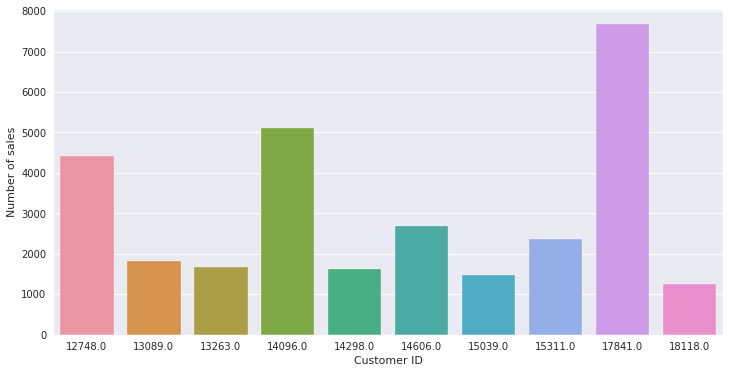

In [128]:
# Visualisation of top 10 online store customers of UK

top_customers = retail_uk_df["CustomerID"].value_counts().head(10)
sns.barplot(x = top_customers.index, y = top_customers.values)
plt.xlabel("Customer ID")
plt.ylabel("Number of sales")
plt.show()

# **Data Preparation for RFM Modelling**

RFM analysis (Recency, Frequency, Monetary) is a tried-and-true marketing model for behavior-based customer segmentation. It categorises customers based on their purchase history - how recently, how frequently, and how much they purchased.

RFM assists in categorising customers and identifying customers who are more likely to respond to promotions as well as future personalisation services.


RFM modelling requires the following features:

1. Customer ID / Email / Name, and so on: To identify the customer.
2. Recency(R): The number of days since the last purchase. How recently did the customer make a purchase?       
3. Frequency(F): The total number of times a transaction is performed. How many times has the customer bought something from the store?     
4. Monetary(M): The total amount of money spent on purchases. How much money did the customer spend?


          Recency = Latest Date - Last Invoice Data
          Frequency = Number of Invoices per transaction(s)
          Monetary = Total Amount for each customer

In [129]:
# Checking the maximum and minimum timestamp 

retail_uk_df["InvoiceDate"].min(), retail_uk_df["InvoiceDate"].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [130]:
# Changing the latest date to 2011-12-10

present_date = dt.datetime(2011, 12, 10)

In [131]:
# Creating a new RFM dataframe

rfm_df = retail_uk_df.groupby("CustomerID", as_index = False).agg({
    "InvoiceDate": lambda date: (present_date - date.max()).days,
    "InvoiceNo": "count",
    "TotalCost": "sum"
}).rename(columns = {
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalCost': 'Monetary'})

rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4412,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [132]:
# Summary of RFM dataframe

rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,91.742092,89.082398,1858.424654
std,1576.594671,99.533485,214.034542,7478.631256
min,12346.000000,0.000000,1.000000,3.750000
25%,14208.750000,17.000000,17.000000,298.185000
50%,15569.500000,50.000000,40.000000,644.975000
75%,16913.250000,142.000000,98.000000,1571.285000
max,18287.000000,373.000000,7676.000000,259657.300000


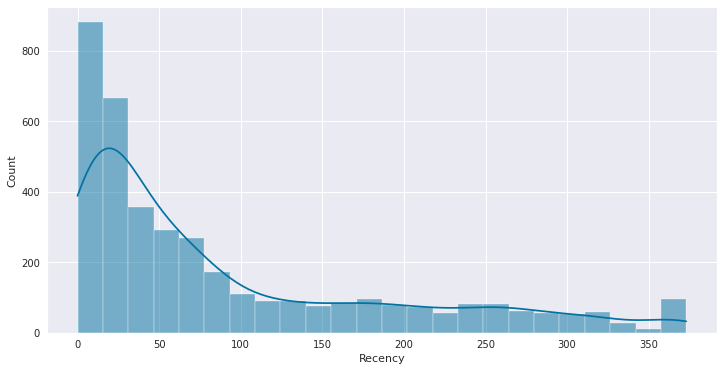

In [133]:
# Distribution of Recency

sns.histplot(x = "Recency", kde = True, data = rfm_df)
plt.show()

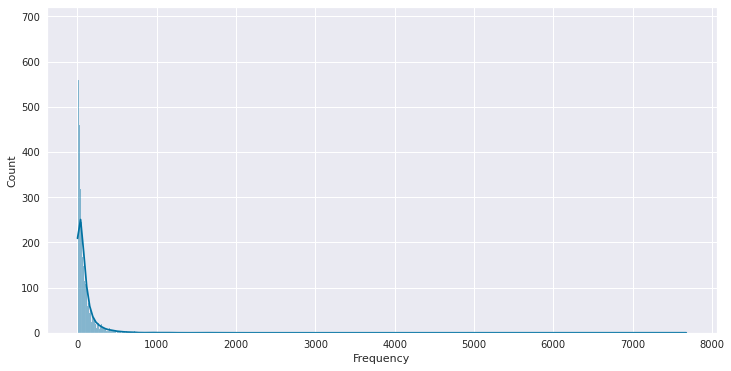

In [134]:
# Distribution of Frequency

sns.histplot(x = "Frequency", kde = True, data = rfm_df)
plt.show()

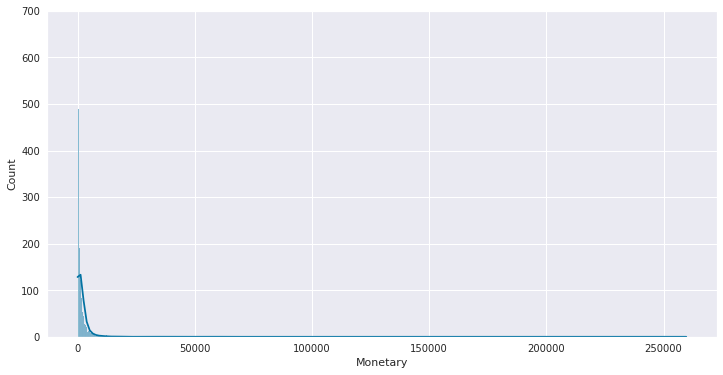

In [135]:
# Distribution of Monetary

sns.histplot(x = "Monetary", kde = True, data = rfm_df)
plt.show()

In [136]:
# # Creating quartiles for RFM

# rfm_df["R_quartile"] = pd.qcut(rfm_df["Recency"], 4, ["1", "2", "3", "4"]).astype(int)
# rfm_df["F_quartile"] = pd.qcut(rfm_df["Frequency"], 4, ["4", "3", "2", "1"]).astype(int)
# rfm_df["M_quartile"] = pd.qcut(rfm_df["Monetary"], 4, ["4", "3", "2", "1"]).astype(int)

In [137]:
# # Checking observations from the updated dataset

# rfm_df.head()

In [138]:
# rfm_df.describe()

In [139]:
# # Summing RFM values to calculate RFM score
# rfm_df['RFM_score'] = rfm_df[["R_quartile", "F_quartile", "M_quartile"]].sum(axis = 1)

# # Creating RFM segment
# rfm_df['RFM_segment'] = rfm_df["R_quartile"].map(str) + rfm_df["F_quartile"].map(str) + rfm_df["M_quartile"].map(str)

# rfm_df.head()

In [140]:
# # Grouping into different tiers

# def get_tier(df):
#   if df["RFM_score"] >= 9:
#     return "Gold"
#   elif (df["RFM_score"] >= 6) and (df["RFM_score"] < 9):
#     return "Silver"
#   else:
#     return "Bronze"

# rfm_df["tier"] = rfm_df.apply(get_tier, axis = 1)
# rfm_df.head()

In [141]:
# # Summary metrics per RFM Score
# score_summary = rfm_df.groupby('RFM_score').agg(
#     mean_recency=('Recency', 'mean'),
#     std_recency=('Recency', 'std'),
#     mean_frequency=('Frequency', 'mean'),
#     std_frequency=('Frequency', 'std'),
#     mean_monetary=('Monetary', 'median'),
#     std_monetary=('Monetary', 'std'),   
#     samples=('CustomerID', lambda x: len(x)*100/len(rfm_df.RFM_score))
# ).round(2)
# # Get the 10 segments with most customers
# popular_segments = rfm_df.RFM_segment.value_counts()[:10].index.tolist()
# # Summary metrics for the 10 most popular RFM Segments
# segment_summary = rfm_df[rfm_df.RFM_segment.isin(popular_segments)].groupby('RFM_segment').agg(
#     mean_recency=('Recency', 'mean'),
#     std_recency=('Recency', 'std'),
#     mean_frequency=('Frequency', 'mean'),
#     std_frequency=('Frequency', 'std'),
#     mean_monetary=('Monetary', 'median'),
#     std_monetary=('Monetary', 'std'),   
#     samples=('CustomerID', lambda x: len(x)*100/len(rfm_df.RFM_score))
# ).round(2)
# # Summary metrics per RFM Tier
# tier_summary = rfm_df.groupby('tier').agg(
#     mean_recency=('Recency', 'mean'),
#     std_recency=('Recency', 'std'),
#     mean_frequency=('Frequency', 'mean'),
#     std_frequency=('Frequency', 'std'),
#     mean_monetary=('Monetary', 'median'),
#     std_monetary=('Monetary', 'std'),   
#     samples_percentage=('CustomerID', lambda x: len(x)*100/len(rfm_df.RFM_score))
# ).round(2)

In [142]:
# score_summary

In [143]:
# rfm_df.groupby('RFM_score').agg({'Recency': 'mean',
#                                  'Frequency': 'mean',
#                                  'Monetary': ['mean', 'count'] }).round(1)

In [144]:
# segment_summary

In [145]:
# tier_summary

Let us now analyse RFM Score distribution and their groups.

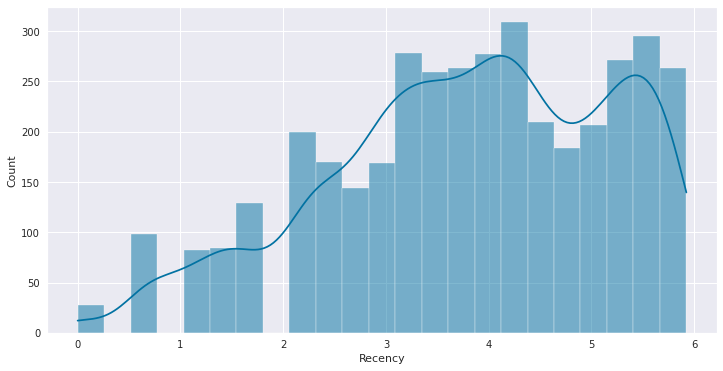

In [170]:
# Distribution of Recency

sns.histplot(data = np.log(rfm_df["Recency"] + 1), kde = True)
plt.show()

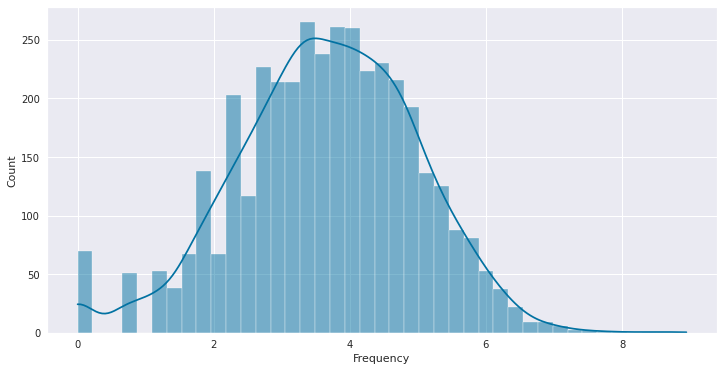

In [147]:
# Distribution of Frequency

sns.histplot(data = np.log(rfm_df["Frequency"]), kde = True)
plt.show()

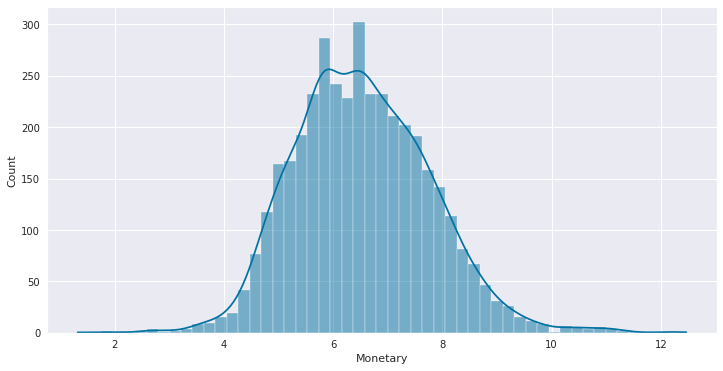

In [148]:
# Distribution of Monetary

sns.histplot(data = np.log(rfm_df["Monetary"]), kde = True)
plt.show()

In [149]:
rfm_df['Recency_log'] = np.log(rfm_df['Recency'] + 1)
rfm_df['Frequency_log'] = np.log(rfm_df['Frequency'])
rfm_df['Monetary_log'] = np.log(rfm_df['Monetary'])

In [150]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
0,12346.0,325,1,77183.60,5.786897,0.000000,11.253942
1,12747.0,2,103,4196.01,1.098612,4.634729,8.341889
2,12748.0,0,4412,33053.19,0.000000,8.392083,10.405873
3,12749.0,3,199,4090.88,1.386294,5.293305,8.316515
4,12820.0,3,59,942.34,1.386294,4.077537,6.848366


In [171]:
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Cluster
count,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,91.742092,89.082398,1858.424654,3.798750,3.653225,6.537687,1.140816
std,1576.594671,99.533485,214.034542,7478.631256,1.382343,1.332604,1.247878,0.743479
min,12346.000000,0.000000,1.000000,3.750000,0.000000,0.000000,1.321756,0.000000
25%,14208.750000,17.000000,17.000000,298.185000,2.890372,2.833213,5.697714,1.000000
50%,15569.500000,50.000000,40.000000,644.975000,3.931826,3.688879,6.469211,1.000000
75%,16913.250000,142.000000,98.000000,1571.285000,4.962845,4.584967,7.359649,2.000000
max,18287.000000,373.000000,7676.000000,259657.300000,5.924256,8.945854,12.467118,2.000000


In [172]:
X = rfm_df[["Recency_log", "Frequency_log", "Monetary_log"]].values.copy()

In [155]:
X.shape

(3920, 3)

In [156]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# data_prepared = scaler.fit_transform(X) 

# **Model Training**

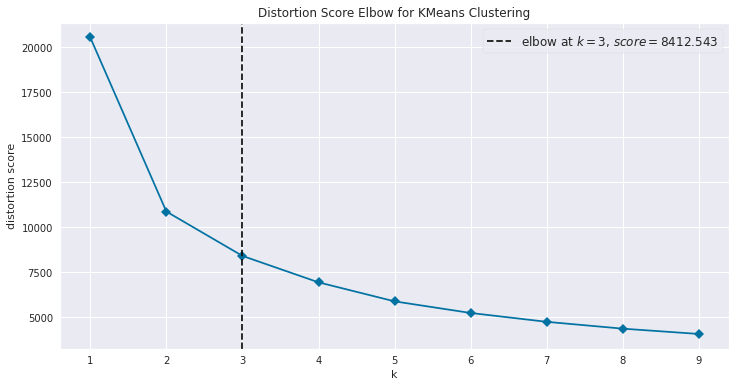

In [173]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
plt.show()

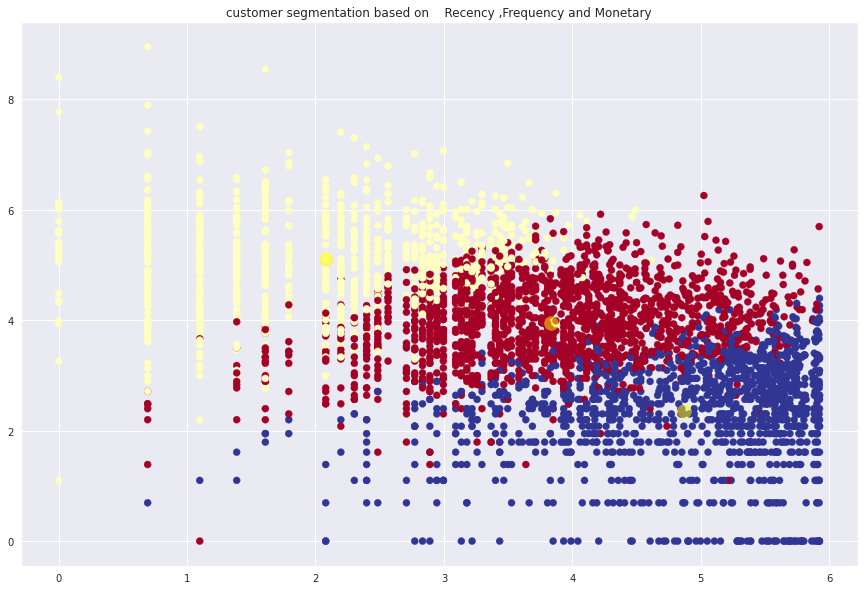

In [174]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)
plt.show()

In [175]:
# creating a column for the cluster
rfm_df['Cluster'] = kmeans.labels_
# checking the column
# rfm_df[rfm_df.Cluster == 0].head(10)

In [176]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Cluster
0,12346.0,325,1,77183.60,5.786897,0.000000,11.253942,0
1,12747.0,2,103,4196.01,1.098612,4.634729,8.341889,1
2,12748.0,0,4412,33053.19,0.000000,8.392083,10.405873,1
3,12749.0,3,199,4090.88,1.386294,5.293305,8.316515,1
4,12820.0,3,59,942.34,1.386294,4.077537,6.848366,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


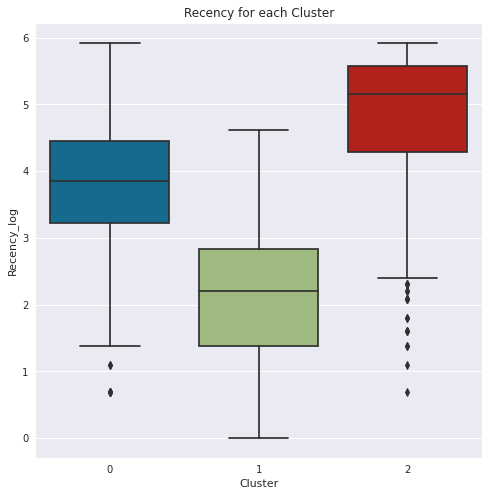

In [182]:
# analyzing Recency
fig, ax = plt.subplots(figsize=(8,8))
plt.title('Recency for each Cluster')
sns.boxplot(rfm_df.Cluster,rfm_df.Recency_log);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


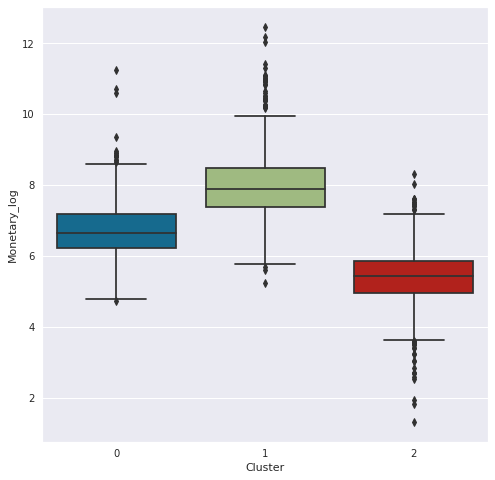

In [183]:
# anaulyzing monetary rates
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(rfm_df.Cluster,rfm_df.Monetary_log);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


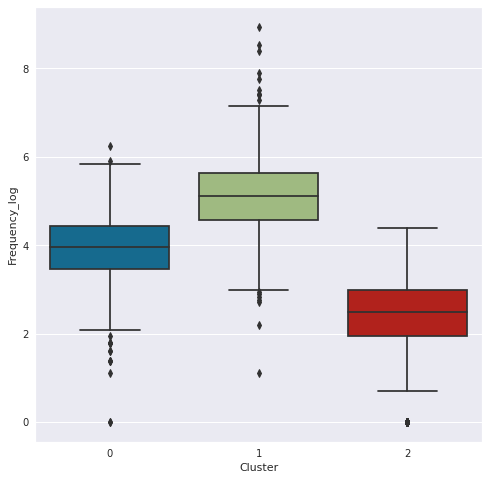

In [184]:
# anaulyzing monetary rates
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(rfm_df.Cluster,rfm_df.Frequency_log);

In [185]:
import chart_studio as py
import plotly.express as px
import plotly.graph_objects as go
# 3D interactive plot
scatter = dict(
    mode = "markers",
    name = "y",
    type = "scatter3d",
    x = rfm_df['Recency'], y = rfm_df['Frequency'], z = rfm_df['Monetary'],
    marker = dict( size=2, color="rgb(23, 190, 207)" )
)
clusters = dict(
    alphahull = 3,
    name = "y",
    opacity = 0.1,
    type = "mesh3d",
     x = rfm_df['Recency'], y = rfm_df['Frequency'], z = rfm_df['Monetary']
)
layout = dict(
    title = '3d point clustering',
    scene = dict(
        xaxis = dict( zeroline=False ),
        yaxis = dict( zeroline=False ),
        zaxis = dict( zeroline=False ),
    )
)
#fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig = go.Figure( data=[scatter, clusters], layout=layout )
fig.show()

ModuleNotFoundError: ignored

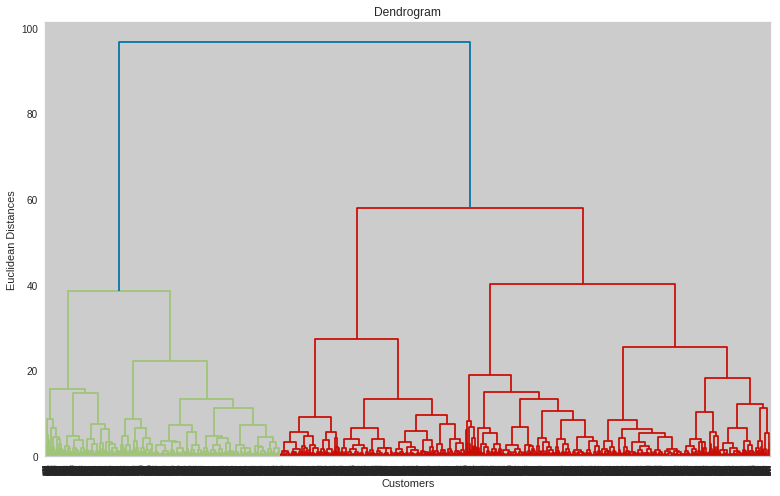

In [67]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(data_prepared, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

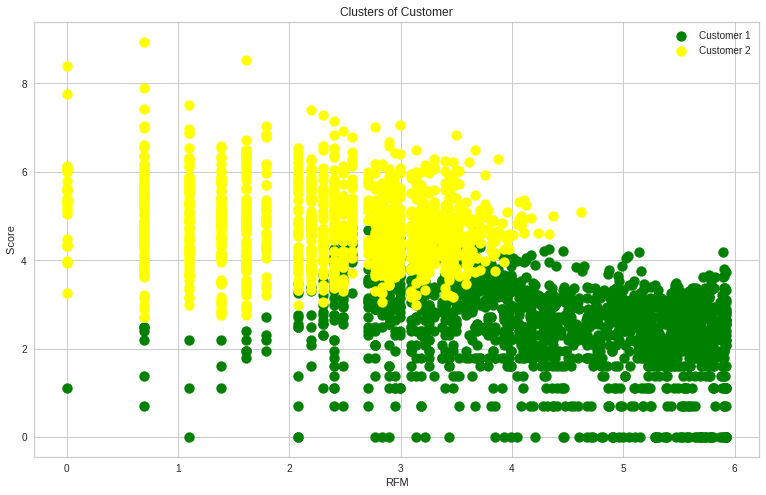

In [68]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_prepared)
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'green', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Customer 2')


plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel(' Score ')
plt.legend()
plt.show()